# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

Импортируем данные.

In [1]:
import pandas as pd
data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [2]:
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [4]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

Расчитаем эффективность обогащения и сравним ее с представленными в обучающей выборке данными. 

In [5]:
data_train['theory_rougher.output.recovery'] = (data_train['rougher.output.concentrate_au']*(data_train['rougher.input.feed_au']-data_train['rougher.output.tail_au'])) / (data_train['rougher.input.feed_au']*(data_train['rougher.output.concentrate_au']-data_train['rougher.output.tail_au']))*100

Сравним фактические значения со значениями, полученными теоретическим путем.

In [6]:
data_train[['theory_rougher.output.recovery','rougher.output.recovery']].head(20)

,theory_rougher.output.recovery,rougher.output.recovery
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794
5,88.156912,88.156912
6,88.168065,88.168065
7,87.668336,87.668336
8,87.035862,87.035862
9,87.650868,87.650868


Посмотрим на количество пропусков.

In [7]:
data_train['rougher.output.recovery'].isna().sum()

2573

In [8]:
data_train['theory_rougher.output.recovery'].isna().sum()

2283

В обучающей выборке больше пропусков, чем в полученных теоретическим путем данных. Для корректного расчета среднего абсолютного отклонения необходими убрать пропуски.

In [9]:
data_recovery = data_train.loc[:,['theory_rougher.output.recovery','rougher.output.recovery']]
#уберем пустые значения, пропущенные в обучающей выборке
data_recovery.dropna(subset =['rougher.output.recovery'], inplace=True)
data_recovery.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14287 entries, 0 to 16859
Data columns (total 2 columns):
theory_rougher.output.recovery    14287 non-null float64
rougher.output.recovery           14287 non-null float64
dtypes: float64(2)
memory usage: 334.9 KB


Найдем MAE между нашими расчётами и значением признака.

In [10]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(data_recovery['theory_rougher.output.recovery'],data_recovery['rougher.output.recovery']).round(4)

0.0

Теоретические расчитанные значения не отличаются от фактических (среднее абсолютное значение пренебрежимо мало).

Проанализируем признаки, недоступные в тестовой выборке.

In [11]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

Узнаем список данных, недоступных в тестовой выборке.

In [12]:
target_names = list(set(data_train.columns)-set(data_test.columns))
target_names.sort()
for name in target_names:
    print (name)

final.output.concentrate_ag
final.output.concentrate_au
final.output.concentrate_pb
final.output.concentrate_sol
final.output.recovery
final.output.tail_ag
final.output.tail_au
final.output.tail_pb
final.output.tail_sol
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_au
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_au
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
rougher.calculation.au_pb_ratio
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.sulfate_to_au_concentrate
rougher.output.concentrate_ag
rougher.output.concentrate_au
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_au
rougher.output.tail_pb
rougher.output.tail_sol
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_au
secondary_cleaner.

In [13]:
data_train.loc[:,target_names].head(5)

,final.output.concentrate_ag,final.output.concentrate_au,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_ag,final.output.tail_au,final.output.tail_pb,final.output.tail_sol,primary_cleaner.output.concentrate_ag,...,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_au,rougher.output.tail_pb,rougher.output.tail_sol,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,theory_rougher.output.recovery
0,6.055403,42.192020,9.889648,5.507324,70.541216,10.411962,2.143149,0.895447,16.904297,8.547551,...,87.107763,5.008018,1.170244,0.508728,19.154297,14.500184,2.606185,4.694824,8.764648,87.107763
1,6.029369,42.701629,9.968944,5.257781,69.266198,10.462676,2.224930,0.927452,16.634514,8.558743,...,86.843261,4.955378,1.184827,0.536689,18.965234,14.265474,2.488248,4.592547,9.001494,86.843261
2,6.055926,42.657501,10.213995,5.383759,68.116445,10.507046,2.257889,0.953716,16.208849,8.603505,...,86.842308,4.843460,1.162562,0.546416,18.808533,14.115662,2.458187,4.624775,8.842896,86.842308
3,6.047977,42.689819,9.977019,4.858634,68.347543,10.422762,2.146849,0.883763,16.532835,7.221879,...,87.226430,4.655288,1.079755,0.542525,19.330200,13.732071,2.322062,4.482453,9.122857,87.226430
4,6.148599,42.774141,10.142511,4.939416,66.927016,10.360302,2.055292,0.792826,16.525686,9.089428,...,86.688794,4.552800,1.012642,0.515438,19.267422,14.079996,2.330448,4.470737,8.871028,86.688794


Все эти признаки являются количественными и относятся к параметрам продукта на всех этапах очистки.

In [15]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

Заменим пропуски на близкие значения (нам известно, что бликие по временп данные похожи). Для замены используем метод interpolate.

In [16]:
column_names = list(data_train.columns)
column_names.remove('date')
for name in column_names:
    print ('Пропусков в', name, ((data_train[name].isna().sum()/len(data_train[name]))*100).round(2), '%')

data_train['date'] = pd.to_datetime(data_train['date'])
data_train.index = data_train['date']
data_train = data_train.interpolate(method='time')
data_train.info()
data_train.head()

Пропусков в final.output.concentrate_ag 0.43 %
Пропусков в final.output.concentrate_pb 0.43 %
Пропусков в final.output.concentrate_sol 2.19 %
Пропусков в final.output.concentrate_au 0.42 %
Пропусков в final.output.recovery 9.02 %
Пропусков в final.output.tail_ag 0.39 %
Пропусков в final.output.tail_pb 1.09 %
Пропусков в final.output.tail_sol 0.86 %
Пропусков в final.output.tail_au 0.39 %
Пропусков в primary_cleaner.input.sulfate 7.75 %
Пропусков в primary_cleaner.input.depressant 7.49 %
Пропусков в primary_cleaner.input.feed_size 0.0 %
Пропусков в primary_cleaner.input.xanthate 5.84 %
Пропусков в primary_cleaner.output.concentrate_ag 0.49 %
Пропусков в primary_cleaner.output.concentrate_pb 2.12 %
Пропусков в primary_cleaner.output.concentrate_sol 3.77 %
Пропусков в primary_cleaner.output.concentrate_au 0.49 %
Пропусков в primary_cleaner.output.tail_ag 0.49 %
Пропусков в primary_cleaner.output.tail_pb 0.59 %
Пропусков в primary_cleaner.output.tail_sol 1.67 %
Пропусков в primary_cleaner.

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,theory_rougher.output.recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763
2016-01-15 01:00:00,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261
2016-01-15 02:00:00,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308
2016-01-15 03:00:00,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430
2016-01-15 04:00:00,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794


По такому же принципу заменим пропуски в тестовой выборке.

In [17]:
target_column_names = list(data_test.columns)
target_column_names.remove('date')
for name in target_column_names:
    print ('Пропусков в', name, ((data_test[name].isna().sum()/len(data_test[name]))*100).round(2), '%')

data_test['date'] = pd.to_datetime(data_test['date'])
data_test.index = data_test['date']
data_test = data_test.interpolate(method='time')
data_test.info()
data_test.head()

Пропусков в primary_cleaner.input.sulfate 5.16 %
Пропусков в primary_cleaner.input.depressant 4.85 %
Пропусков в primary_cleaner.input.feed_size 0.0 %
Пропусков в primary_cleaner.input.xanthate 2.83 %
Пропусков в primary_cleaner.state.floatbank8_a_air 0.27 %
Пропусков в primary_cleaner.state.floatbank8_a_level 0.27 %
Пропусков в primary_cleaner.state.floatbank8_b_air 0.27 %
Пропусков в primary_cleaner.state.floatbank8_b_level 0.27 %
Пропусков в primary_cleaner.state.floatbank8_c_air 0.27 %
Пропусков в primary_cleaner.state.floatbank8_c_level 0.27 %
Пропусков в primary_cleaner.state.floatbank8_d_air 0.27 %
Пропусков в primary_cleaner.state.floatbank8_d_level 0.27 %
Пропусков в rougher.input.feed_ag 0.27 %
Пропусков в rougher.input.feed_pb 0.27 %
Пропусков в rougher.input.feed_rate 0.68 %
Пропусков в rougher.input.feed_size 0.38 %
Пропусков в rougher.input.feed_sol 1.14 %
Пропусков в rougher.input.feed_au 0.27 %
Пропусков в rougher.input.floatbank10_sulfate 4.39 %
Пропусков в rougher.inp

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


# 2. Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

In [18]:
print ('Средняя концентрация Au после флотации:', data_train['rougher.output.concentrate_au'].mean().round(2))
print ('Средняя концентрация Au после первого этапа очистки:', data_train['primary_cleaner.output.concentrate_au'].mean().round(2))
print ('Средняя концентрация Au после второго этапа очистки:', data_train['final.output.concentrate_au'].mean().round(2))
print ('Средняя концентрация Ag после флотации:', data_train['rougher.output.concentrate_ag'].mean().round(2))
print ('Средняя концентрация Ag после первого этапа очистки:', data_train['primary_cleaner.output.concentrate_ag'].mean().round(2))
print ('Средняя концентрация Ag после второго этапа очистки:', data_train['final.output.concentrate_ag'].mean().round(2))
print ('Средняя концентрация Pb после флотации:', data_train['rougher.output.concentrate_pb'].mean().round(2))
print ('Средняя концентрация Pb после первого этапа очистки:', data_train['primary_cleaner.output.concentrate_pb'].mean().round(2))
print ('Средняя концентрация Pb после второго этапа очистки:', data_train['final.output.concentrate_pb'].mean().round(2))

Средняя концентрация Au после флотации: 17.33
Средняя концентрация Au после первого этапа очистки: 29.03
Средняя концентрация Au после второго этапа очистки: 39.32
Средняя концентрация Ag после флотации: 10.54
Средняя концентрация Ag после первого этапа очистки: 7.39
Средняя концентрация Ag после второго этапа очистки: 4.7
Средняя концентрация Pb после флотации: 6.85
Средняя концентрация Pb после первого этапа очистки: 8.51
Средняя концентрация Pb после второго этапа очистки: 9.08


На каждом этапе концентрация золота(Au) и свинца(Pb) растет, а концентрация серебра (Ag) падает. Рассмотрим распределения этих концентраций.

In [19]:
data_train['rougher.output.concentrate_au'].hist(bins = 30, alpha =0.7)
data_train['primary_cleaner.output.concentrate_au'].hist(bins = 30, alpha =0.7)
data_train['final.output.concentrate_au'].hist(bins = 30, figsize=(10,5), alpha =0.7)

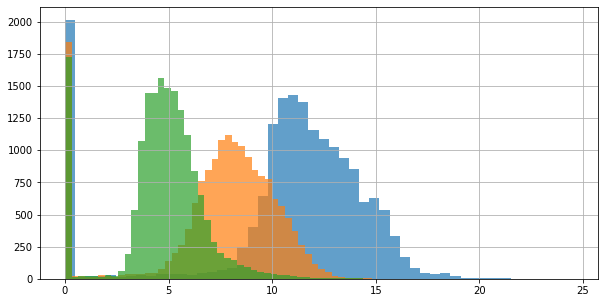

In [20]:
data_train['rougher.output.concentrate_ag'].hist(bins = 50, alpha =0.7)
data_train['primary_cleaner.output.concentrate_ag'].hist(bins = 50, alpha =0.7)
data_train['final.output.concentrate_ag'].hist(bins = 50, figsize=(10,5), alpha =0.7)

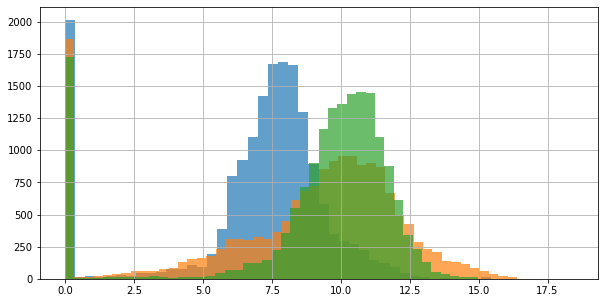

In [21]:
data_train['rougher.output.concentrate_pb'].hist(bins = 50, alpha =0.7)
data_train['primary_cleaner.output.concentrate_pb'].hist(bins = 50, alpha =0.7)
data_train['final.output.concentrate_pb'].hist(bins = 50,figsize=(10,5), alpha =0.7)

Распределения близки к нормальным, при этом на каждом этапе присутвует аномально большое количество значений, равных нулю. В дальнейшем эти данные нужно убрать из обучающей выборки, для более эффективного обучения модели.

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. 

In [22]:
data_train['rougher.input.feed_size'].describe()

count    16860.000000
mean        59.152776
std         26.131277
min          9.659576
25%         47.540138
50%         54.029671
75%         65.272775
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [23]:
data_test['rougher.input.feed_size'].describe()

count    5856.000000
mean       55.886800
std        22.704970
min         0.046369
25%        43.865121
50%        49.964796
75%        61.615634
max       477.445473
Name: rougher.input.feed_size, dtype: float64

Распределения отличаются несильно.

Теперь исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [24]:
data_train['rougher.sum_concentrate'] = data_train['rougher.output.concentrate_ag']+data_train['rougher.output.concentrate_pb']+data_train['rougher.output.concentrate_sol']+data_train['rougher.output.concentrate_au']
data_train['primary_cleaner.sum_concentrate'] = data_train['primary_cleaner.output.concentrate_ag']+data_train['primary_cleaner.output.concentrate_pb']+data_train['primary_cleaner.output.concentrate_sol']+data_train['primary_cleaner.output.concentrate_au']
data_train['final.sum_concentrate'] = data_train['final.output.concentrate_ag']+data_train['final.output.concentrate_pb']+data_train['final.output.concentrate_sol']+data_train['final.output.concentrate_au']

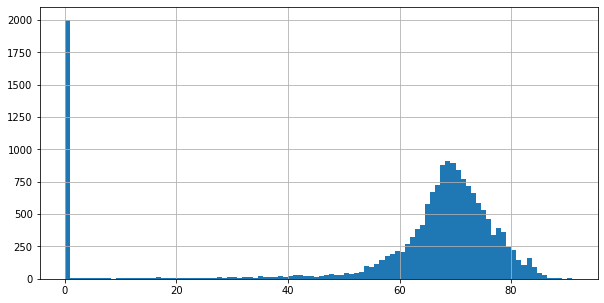

In [25]:
data_train['rougher.sum_concentrate'].hist(bins=100, figsize=(10,5))

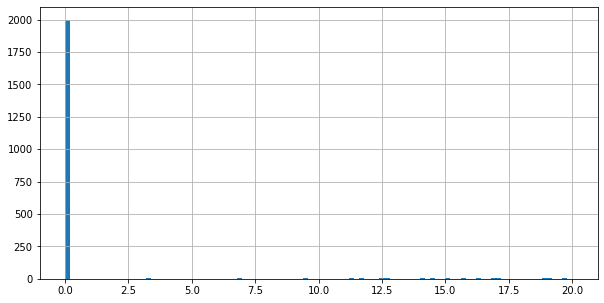

In [26]:
data_train['rougher.sum_concentrate'].hist(bins=100, figsize=(10,5), range= (0,20))

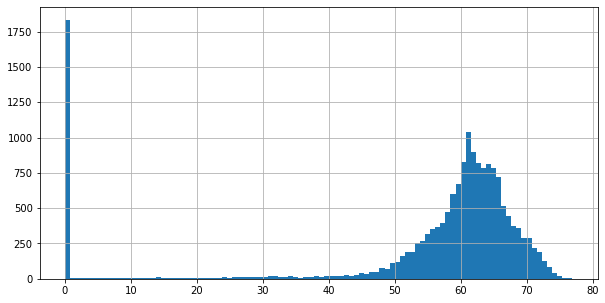

In [27]:
data_train['primary_cleaner.sum_concentrate'].hist(bins=100, figsize=(10,5))

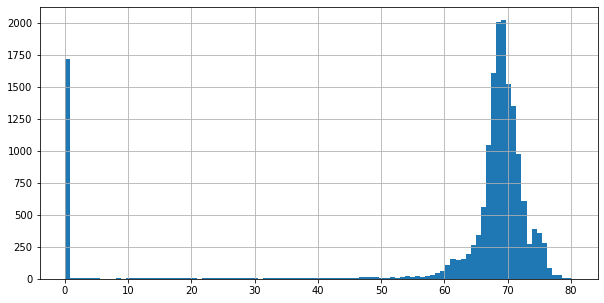

In [28]:
data_train['final.sum_concentrate'].hist(bins=100, figsize=(10,5))

Во всех распределениях присутвует аномально большое количество значений, близких к 0. Удалим аномалии.

In [29]:
data_train = data_train[(data_train['final.sum_concentrate']>1)&
                        (data_train['primary_cleaner.sum_concentrate']>1)&
                        (data_train['rougher.sum_concentrate']>1)]

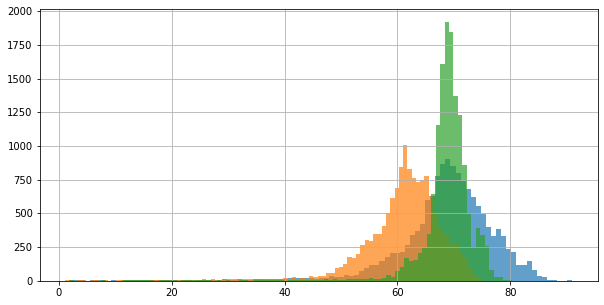

In [30]:
data_train['rougher.sum_concentrate'].hist(bins=100, figsize=(10,5),alpha=0.7)
data_train['primary_cleaner.sum_concentrate'].hist(bins=100, figsize=(10,5),alpha=0.7)
data_train['final.sum_concentrate'].hist(bins=100, figsize=(10,5),alpha=0.7)

Чтобы правильно объяснить природу появления таких аномальных значений, стоит проконсультироваться со специалистами по процессу очистки.

# 3. Модель

Подготовим признаки исходя из того, что на начальном этапе нам доступны признаки более поздних этапов. 
В противном случае нам бы пришлось делить признаки по этапам (на начальном этапе мы имеем только rougher признакие, на следующем rougher + primary_cleaner и тд)

In [25]:
target_names = list(set(data_train.columns)-set(data_test.columns))
#выделим признаки
features = data_train.drop(target_names, axis=1).drop('date', axis=1)
target_rougher = data_train['rougher.output.recovery']
target_final = data_train['final.output.recovery']

In [26]:
import numpy as np
def smape(target, prediction):
    return 100/len(target) * np.sum(2*np.abs(target-prediction) / (np.abs(target) + np.abs(prediction)))

In [27]:
def total_smape(rougher, final):
    total = rougher*0.25+final*0.75
    return total

In [28]:
from sklearn.model_selection import train_test_split
features_train, features_valid, target_r_train, target_r_valid,target_f_train, target_f_valid = train_test_split(features, target_rougher, target_final, test_size=0.25, random_state=12345)

Обучим модели линейной регрессии.

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model_rougher_lr = LinearRegression()
model_rougher_lr.fit(features_train,target_r_train)
predicted_valid=model_rougher_lr.predict(features_valid)
print ('R2 =', r2_score(target_r_valid,predicted_valid))
print ('sMAPE =', smape(target_r_valid,predicted_valid))
sMAPE_r = smape(target_r_valid,predicted_valid)

R2 = 0.4682769962020987
sMAPE = 5.137282946333898


In [30]:
model_final_lr = LinearRegression()
model_final_lr.fit(features_train,target_f_train)
predicted_valid=model_final_lr.predict(features_valid)
print ('R2 =', r2_score(target_f_valid,predicted_valid))
print ('sMAPE =', smape(target_f_valid,predicted_valid))
sMAPE_f = smape(target_f_valid,predicted_valid)

R2 = 0.33311031314856665
sMAPE = 8.482692448024


In [31]:
print ('Total sMAPE =', total_smape(sMAPE_r, sMAPE_f))

Total sMAPE = 7.6463400726014745


Теперь используем модель решающего дерева.

In [32]:
best_result = 200
for i in range (1,15):
    model_rougher_dt = DecisionTreeRegressor(random_state = 12345, max_depth = i)
    model_rougher_dt.fit(features_train,target_r_train)
    predicted_valid=model_rougher_dt.predict(features_valid)
    print ('R2 =', r2_score(target_r_valid,predicted_valid))
    print ('sMAPE =', smape(target_r_valid,predicted_valid))
    print ()
    sMAPE_r = smape(target_r_valid,predicted_valid)
    if sMAPE_r < best_result:
        best_result = sMAPE_r
print ('Лучший результат', best_result)
sMAPE_r = best_result

R2 = 0.17693137466306497
sMAPE = 6.6918484558347044

R2 = 0.27980588208221924
sMAPE = 6.01431552793464

R2 = 0.3513501238531469
sMAPE = 5.7299993373403275

R2 = 0.41502165100270927
sMAPE = 5.283358196476235

R2 = 0.46835694059971056
sMAPE = 5.044989027198118

R2 = 0.4616473434681875
sMAPE = 4.949593079471745

R2 = 0.5004995009313845
sMAPE = 4.662112225707465

R2 = 0.5307318307726576
sMAPE = 4.509028043055204

R2 = 0.46137714820420417
sMAPE = 4.576043396769444

R2 = 0.469606632328336
sMAPE = 4.4164441797751754

R2 = 0.5213852295928516
sMAPE = 4.14402390035948

R2 = 0.5036200652881604
sMAPE = 4.115460724761451

R2 = 0.47488314987737945
sMAPE = 4.195420168004946

R2 = 0.500778729812423
sMAPE = 4.112865070693074

Лучший результат 4.112865070693074


In [33]:
best_result = 200
for i in range (1,15):
    model_final_dt = DecisionTreeRegressor(random_state = 12345, max_depth = i)
    model_final_dt.fit(features_train,target_f_train)
    predicted_valid=model_final_dt.predict(features_valid)
    print ('R2 =', r2_score(target_f_valid,predicted_valid))
    print ('sMAPE =', smape(target_f_valid,predicted_valid))
    print ()
    sMAPE_f = smape(target_f_valid,predicted_valid)
    if sMAPE_f < best_result:
        best_result = sMAPE_f
print (best_result)
sMAPE_f = best_result

R2 = 0.1187314367626554
sMAPE = 10.067973845060427

R2 = 0.2064253398851198
sMAPE = 9.25362534687284

R2 = 0.2589260362254203
sMAPE = 8.934170223632378

R2 = 0.30313144420794025
sMAPE = 8.650407449395479

R2 = 0.35161717682586024
sMAPE = 8.363645549885057

R2 = 0.3642355608755018
sMAPE = 8.022746947710175

R2 = 0.359132609933157
sMAPE = 8.02200799035851

R2 = 0.3657120963251357
sMAPE = 7.855422606608246

R2 = 0.37114298148578595
sMAPE = 7.723336826394349

R2 = 0.3398147924181245
sMAPE = 7.85682966099147

R2 = 0.3347990164362641
sMAPE = 7.845174910970102

R2 = 0.36053401995986656
sMAPE = 7.723747436574688

R2 = 0.34890808413776464
sMAPE = 7.724118623463042

R2 = 0.31574444633510157
sMAPE = 7.8947235058766125

7.723336826394349


In [34]:
print ('Total sMAPE =', total_smape(sMAPE_r, sMAPE_f))

Total sMAPE = 6.820718887469031


Теперь используем модель случайного леса.

In [35]:
best_result = 200
best_n_of_est = 10
best_depth = 0
for n in range (200,210,50):
    for i in range (20,21,5):    
        model_rougher_rfr = RandomForestRegressor(n_estimators=n, max_depth = i, random_state = 12345)
        model_rougher_rfr.fit(features_train,target_r_train)
        predicted_valid=model_rougher_rfr.predict(features_valid)
        print ('N_est:', n, 'Max_depth', i)
        print ('R2 =', r2_score(target_r_valid,predicted_valid))
        print ('sMAPE =', smape(target_r_valid,predicted_valid))
        print ()
        sMAPE_r = smape(target_r_valid,predicted_valid)
        if sMAPE_r < best_result:
            best_result = sMAPE_r
            best_n_of_est = n
            best_depth = i
            best_model_rougher_rfr = model_rougher_rfr
print ('Лучший результат sMAPE:', best_result,'при', best_n_of_est, 'оценщиках и макисмальной глубине', best_depth)
sMAPE_r = best_result

N_est: 200 Max_depth 20
R2 = 0.693857994442596
sMAPE = 3.106275657567864

Лучший результат sMAPE: 3.106275657567864 при 200 оценщиках и макисмальной глубине 20


In [36]:
best_result = 200
best_n_of_est = 10
best_depth = 0
for n in range (200,210,50):
    for i in range (20,21,5):    
        model_final_rfr = RandomForestRegressor(n_estimators=n, max_depth = i, random_state = 12345)
        model_final_rfr.fit(features_train,target_f_train)
        predicted_valid=model_final_rfr.predict(features_valid)
        print ('N_est:', n, 'Max_depth', i)
        print ('R2 =', r2_score(target_f_valid,predicted_valid))
        print ('sMAPE =', smape(target_f_valid,predicted_valid))
        print ()
        sMAPE_f = smape(target_f_valid,predicted_valid)
        if sMAPE_f < best_result:
            best_result = sMAPE_f
            best_n_of_est = n
            best_depth = i
            best_model_final_rfr = model_final_rfr
print ('Лучший результат sMAPE:', best_result,'при', best_n_of_est, 'оценщиках и макисмальной глубине', best_depth)
sMAPE_f = best_result

N_est: 200 Max_depth 20
R2 = 0.5969924503899438
sMAPE = 6.05389538598529

Лучший результат sMAPE: 6.05389538598529 при 200 оценщиках и макисмальной глубине 20


In [37]:
print ('Total sMAPE =', total_smape(sMAPE_r, sMAPE_f))

Total sMAPE = 5.316990453880933


Минимальный итоговый sMAPE был получен на модели случайного леса.

Проверим качество моделей с помощью кросс-валидации.

In [38]:
#в качестве метрики оценки будем использовать sMAPE
from sklearn.metrics import make_scorer
neg_smape = make_scorer(smape)

model_rougher_lr = LinearRegression()
final_score = pd.Series(cross_val_score(model_rougher_lr, features, target_rougher, cv=5, scoring = neg_smape)).mean()
print('Средняя оценка качества модели:', final_score)

Средняя оценка качества модели: 7.694858272388032


In [39]:
model_final_lr = LinearRegression()
final_score = pd.Series(cross_val_score(model_final_lr, features, target_final, cv=5, scoring = neg_smape)).mean()
print('Средняя оценка качества модели:', final_score)

Средняя оценка качества модели: 11.525571974447006


In [40]:
model_rougher_dt = DecisionTreeRegressor(random_state = 12345)
final_score = pd.Series(cross_val_score(model_rougher_dt, features, target_rougher, cv=5, scoring = neg_smape)).mean()
print('Средняя оценка качества модели:', final_score)

Средняя оценка качества модели: 14.111141986379337


In [41]:
model_final_dt = DecisionTreeRegressor(random_state = 12345)
final_score = pd.Series(cross_val_score(model_final_dt, features, target_final, cv=5, scoring = neg_smape)).mean()
print('Средняя оценка качества модели:', final_score)

Средняя оценка качества модели: 16.976062744579334


In [42]:
model_rougher_rf = RandomForestRegressor(random_state = 12345, n_estimators = 200, max_depth = 20)
final_score = pd.Series(cross_val_score(model_rougher_rf, features, target_rougher, cv=5, scoring = neg_smape)).mean()
print('Средняя оценка качества модели:', final_score)

Средняя оценка качества модели: 7.481695958559752


In [43]:
model_final_rf = RandomForestRegressor(random_state = 12345, n_estimators = 200, max_depth =20)
final_score = pd.Series(cross_val_score(model_final_dt, features, target_final, cv=5, scoring = neg_smape)).mean()
print('Средняя оценка качества модели:', final_score)

Средняя оценка качества модели: 16.976062744579334


Для тестирования модели на тестовой выборке, возьмем целевые признаки из полной таблицы.

In [44]:
data_test.index= range (0,len(data_test))

In [45]:
#на данном этапе можем выделить признаки 
features_test = data_test.drop('date', axis =1)
#теперь можем добавить целевые признаки
data_full_targets = data_full.loc[:,['date','rougher.output.recovery','final.output.recovery']]
data_full_targets['date'] = pd.to_datetime(data_full_targets['date'])
data_test = data_test.merge(data_full_targets, on='date', how='inner')

In [46]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 55 columns):
date                                          5856 non-null datetime64[ns]
primary_cleaner.input.sulfate                 5856 non-null float64
primary_cleaner.input.depressant              5856 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5856 non-null float64
primary_cleaner.state.floatbank8_a_air        5856 non-null float64
primary_cleaner.state.floatbank8_a_level      5856 non-null float64
primary_cleaner.state.floatbank8_b_air        5856 non-null float64
primary_cleaner.state.floatbank8_b_level      5856 non-null float64
primary_cleaner.state.floatbank8_c_air        5856 non-null float64
primary_cleaner.state.floatbank8_c_level      5856 non-null float64
primary_cleaner.state.floatbank8_d_air        5856 non-null float64
primary_cleaner.state.floatbank8_d_level      5856 non-null float64
ro

В целевых признаках присутвуют пропуски, заменим с помощью метода interpolate.

In [47]:
data_test.index = data_test['date']
data_test = data_test.interpolate(method = 'time')

In [48]:
target_rough_test = data_test['rougher.output.recovery']
target_final_test = data_test['final.output.recovery']

In [49]:
predicted_valid_r = best_model_rougher_rfr.predict(features_test)
print ('sMAPE =', smape(target_rough_test,predicted_valid_r))
sMAPE_r = smape(target_rough_test,predicted_valid_r)

sMAPE = 9.364872572684206


In [50]:
predicted_valid_f = best_model_final_rfr.predict(features_test)
print ('sMAPE =', smape(target_final_test,predicted_valid_f))
print ()
sMAPE_f = smape(target_final_test,predicted_valid_f)

sMAPE = 15.395206277908393



In [51]:
print ('Total sMAPE =', total_smape(sMAPE_r, sMAPE_f))

Total sMAPE = 13.887622851602346


На тестовой выборке получено итоговое sMAPE = 13.89 (при замене пропусков медианой 11.27%). 